# Solving PDEs: Boundary Value Problems

We began our discussion of ODEs with initial value problems (IVPs), because they are usually the simpler and more common class of ODE problem. Now we will turn our attention to *partial differential equations* (PDEs), where this distinction instead belongs to boundary value problems (BVPs). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The Laplace Equation and an empty conducting box

In the absence of charge, Maxwell's equation for the divergence of the electric field becomes $\nabla \cdot \vec{E} = 0$. The electrostatic potential $\phi$ is related to the electric field $\vec{E}$ by $\vec{E} = -\nabla \phi$. We can thus describe the electric potential via the **Laplace equation**:

$$\nabla^2 \phi = 0$$

which in two dimensions can be written 

$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0$$

### A simple problem

Consider an empty 2D box with conducting walls. Three of the walls are grounded at 0 volts, but the wall at the top is at some other voltage $V$. Assume that the gap between the top wall and the others is negligible. What is the electric potential everywhere inside this box? 

We can solve this using our traditional solutions to PDEs. If we assume $\phi$ is separable, then we have:
$$\frac{\partial^2 X(x)}{\partial x^2}Y(y) + \frac{\partial^2 Y(y)}{\partial y^2}X(x) = X''(x) Y(y) + X(x) Y''(y) = 0$$

Given the boundary condition that $\phi(x, L) = V$ and $\phi(0, y) = \phi(L, y) = \phi(x, 0) = 0$, we can solve that:
$$ \phi(x, y) = \sum_{n=1}^\infty A_n \sin(\frac{n \pi x}{L}) \frac{\sin(\frac{n \pi y}{L})}{\sin(\frac{n \pi}{L})} $$

## Relaxation Methods

We will now study a class of methods called **relaxation methods**. The basic idea is this: if we have an equation and a boundary condition, like the Laplace equation problem described above, we can discretize the domain over which we will solve our problem: we imagine, for example, that space is divided into evenly spaced grid points. We know the solution of the equation on the boundaries of the domain, but nowhere else. When we discretize our domain, we discretize our equation over it: essentially this means that we now have an equation for every grid point. Then we just take a wild guess at the solution over the whole domain. It can be a terrible guess, e.g., that the electrostatic potential is zero everywhere inside our box. The idea is that we start with our guess and iteratively compute our equations over each grid point until our whole domain "relaxes" to the correct solution, and our answer stops changing. 

&#128310; In your own words, explain how you will know when your solution has converged.

✍🏽 Our solution will converge when over any iteration, our change in our answer at every gridpoint changes by less than a particular target accuracy that we can predefine. This will be close to when the existing answer or set of gridpoints satisfies Laplace's equation or whichever PDE we're considering.

Before we go any further, let's explore object assignment and copying objects in Python. 

## Copying Python objects

When we use iterative techniques, often we want to compare a Python object at a previous step to a Python object at the current step. Thus we may find ourselves wanting to make a copy of a Python object. You may be tempted to do this as follows

`new_thing = old_thing`

In other words, to assign object `new_thing` the value `old_thing`. You may then run into some unexpected and perhaps unwanted behavior: in some cases, if you modify `old_thing`, `new_thing` will change. Let's first explore this behavior, and then we will discuss why it happens. 

&#128309; Initialize an object `old_number` as the integer 3. Then set `new_number = old_number` and print `new_number`. Now add 1 to `old_number`. What happens when you print `new_number`? ✅

In [3]:
old_number = 3
new_number = old_number
print(new_number)

old_number += 1
print(new_number) # the result is that we correctly don't update the new number

3
3


✍🏽 When we set new number = old number, and then edit the old number, we correctly don't update the new number. This is what we expect because we want the new number to be remembered separately. 

&#128309; Now initialize an object `old_list` as *a list containing the* integer 3. Then set `new_list = old_list` and print `new_list`. Now add 1 to the list element in `old_list`. What happens when you print `new_list` now? ✅

In [4]:
old_list = [3]
new_list = old_list
print(new_list)

old_list[0] = old_list[0] + 1
print(new_list) # now new list has updated based on us changing old list, which is unexpected behavior

[3]
[4]


✍🏽 Here, when we reset new list to old list and then edit the element of old list, our new list changes. This might be true because the memory of our old list and new list are stored in the same memory location and the variable name "new list" or "old list" acts as a pointer. 

You should have observed that `new_list` changed when `old_list` changed, but the same behavior was not seen when your objects were integers. Why? When you use the equals sign to assign an object in Python, you are binding the name to the object. **This does not create a new object in memory.** Say you bind an object `new_thing` to the object `old_thing`. For immutable objects like numbers, booleans, and tuples, subsequent changes to one of these objects will not affect the other. But for **mutable** objects like lists, sets, dictionaries, and numpy arrays, the object referenced by both `new_thing` and `old_thing` can be changed -- hence the surprising behavior when we alter one of these expecting the other to be unchanged. 

&#128309; The built-in function `id` returns a unique integer for each object. Use it to demonstrate when an object assignment (e.g., `a = b`) or change to an object references the same item in memory. Play around with this and show evidence of at least two different examples. ✅

In [5]:
number_1 = 1
number_2 = number_1
number_1 += 1
print("1st num id: ", id(number_1), " and 2nd num id: ", id(number_2))
print("ID is different because num1 and num2 aren't equal 🟢") if id(number_1) != id(number_2) else print("IDs are incorrectly the same 🔴")

dict_1 = {1: 10}
dict_2 = dict_1
dict_1[1] = 20
print("1st num id: ", id(dict_1), " and 2nd num id: ", id(dict_2))
print("ID is different because dict1 and dict2 aren't equal 🟢") if id(dict_1) != id(dict_2) else print("IDs are incorrectly the same 🔴")

1st num id:  4330087648  and 2nd num id:  4330087616
ID is different because num1 and num2 aren't equal 🟢
1st num id:  4360565952  and 2nd num id:  4360565952
IDs are incorrectly the same 🔴


Okay, but what to do when we really need a copy of a mutable object? For numpy arrays we can use `np.copy`. For other data types we can make use of <a target="_blank" rel="noopener noreferrer"  href="https://docs.python.org/3/library/copy.html" >the `copy` package</a>.

&#128309; Convince yourself of this behavior with testing similar to the above, but using a numpy array. Demonstrate the different behavior with and without using `np.copy`. 

In [6]:
array1 = np.array([1])
array2 = np.copy(array1)
array1 += 1
print("1st num id: ", id(array1), " and 2nd num id: ", id(array2))
print("ID is different because array1 and array2 aren't equal 🟢") if id(array1) != id(array2) else print("IDs are incorrectly the same 🔴")

1st num id:  4360184592  and 2nd num id:  4546891376
ID is different because array1 and array2 aren't equal 🟢


## The Jacobi Method and an empty conducting box

Consider again the Laplace equation and our empty conducting box with the top wall held at voltage $V$. To solve this problem we need to first discretize the second derivative. Consider a simple finite difference derivative that computes the derivative of a function $f$ centered at $x$ (this is called a central difference derivative):

$$\frac{df}{dx} \approx \frac{f(x + h/2) - f(x - h/2)}{h}$$

We can apply central differencing again to get an expression for the second derivative:

$$f''(x) \approx \frac{f'(x + h/2) - f'(x - h/2)}{h} = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$$

Use this to derive the central difference approximation to the Laplacian operator in two dimensions. You should find

$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \approx \frac{1}{h^2} \left(\phi(x+h, y) + \phi(x-h, y) + \phi(x, y+h) + \phi(x, y-h) - 4\phi(x, y)\right)$$

Note that if we set this equal to 0, as we do in the Laplace equation, the factor $\frac{1}{h^2}$ drops out. 

The **Jacobi method** is the simplest version of a relaxation method: simply loop through your grid points, computing your equation local on each one, and enforcing the boundary conditions on the boundaries. Continue until your solution converges. 

&#128309; Implement the Jacobi method to solve the 2D Laplace equation for the empty conducting box problem, using for loops to loop over your 2D coordinates. Compute until your solution is converged everywhere on the grid to within $10^{-6}$. Be sure to enforce your boundary conditions! *Caution: this double loop will be fairly slow. I suggest starting with a 20 x 20 grid.*

Converged after  628  iterations


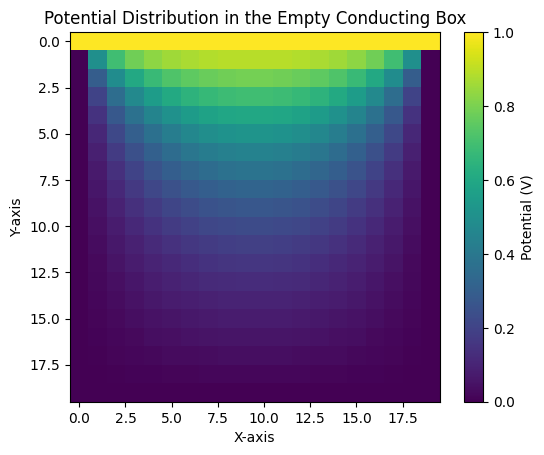

In [51]:
# initialize grid
nx, ny = (20, 20)
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)

# intialize guess of phi
phi = np.zeros((nx, ny))

# define boundary conditions
V = 1
phi[0, :] = V

# copy array to step
phi_new = np.copy(phi)

# define relevant variables
target_accuracy = 1e-6

# Jacobi iteration
done = False
iteration = 0

# jacobian method loop
while not done:
    iteration += 1
    max_diff = 0
    
    # iterate through every point on grid
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            
            # update via central difference approximation, solved for phi
            phi_new[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])

            # update max difference
            max_diff = max(max_diff, abs(phi_new[i, j] - phi[i, j]))
    
    # update potential array
    phi = np.copy(phi_new)
    
    # stop if converged
    if max_diff < target_accuracy:
        done = True

print("Converged after ", iteration, " iterations")

# plot potential distribution
plt.imshow(phi)
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution in the Empty Conducting Box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


## Array Indexing: More Practice

we have done a good amount of array indexing in this class so far, but as our array indexing tasks get more and more complicated, it's good to practice. We'll do some quick array indexing practice using an array I have prepared for you. Download the saved numpy array `maki.npy` from Canvas, save it to a subfolder `data` of the directory where this notebook is stored, and load it using `np.load`. Use matplotlib's `imshow` to display the array below. ✅

(896, 540, 3)


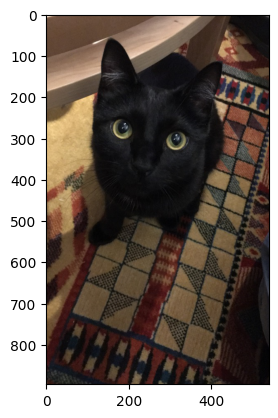

In [9]:
maki = np.load("data/maki.npy")
plt.imshow(maki)
print(maki.shape)

Meet my cat, Maki. 

&#128310; What shape is this array? What does each dimension represent? ✅

✍🏽 This array is (896, 540, 3), which means there are 896 by 540 points, each with 3 "layers" to them. We can assume that the first dimension is the vertical location, the second is the horizontal location, and the third dimension is the RGB values associated with the cat image. 

&#128309; Zoom in on Maki's face in one line of code. Trim pixels off of the boundary of the image using the array index notation `array[start:stop:step]`, recalling that negative integers count backward from the end of the array axis. Use this as an opportunity to be sure you understand which axis is which. Plot your trimmed image. ✅

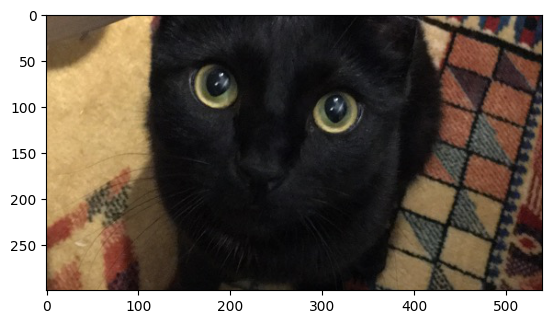

In [10]:
plt.imshow(maki[100:500][100:400])

&#128309; Use the `[start:stop:step]` notation to plot a version of the image that's reversed along the x-axis in one line of code. ✅

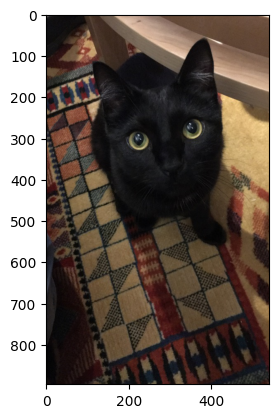

In [54]:
plt.imshow(maki[:, ::-1])

&#128310; What happens if you plot just one index of the third axis? Why? ✅

✍🏽 If we plot only one index of the third axis then we only express one of the colors of the image and hence it becomes a grayscale image with the quantity of red or green or blue being expressed. This is because the third axis represents the colors of the image.

## The Jacobi Method Revisited: A faster implementation with array indexing


&#128309; Re-implement the Jacobi method, but use array indexing to update the whole array at once for each iteration. Keep track of how many iterations your code uses, and print a sentence that states how many iterations were used. Think about how you will implement this before starting. You may want to write out pseudocode or draw something on scratch paper. This should be much faster, so go ahead and compute on a 100 x 100 grid, and then plot! 

Converged after  10562  iterations


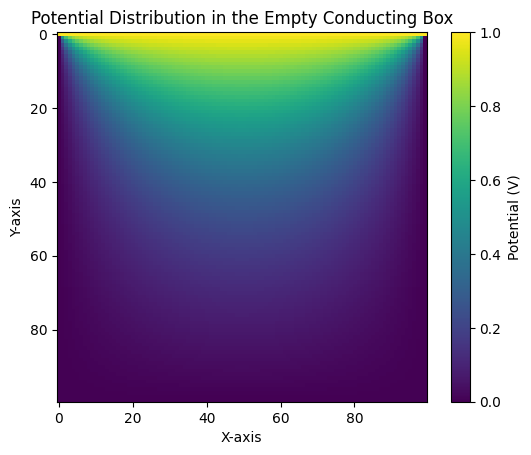

In [50]:
# initialize grid
nx, ny = (100, 100)
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)

# intialize guess of phi
phi = np.zeros((nx, ny))

# define boundary conditions
V = 1
phi[0, :] = V

# copy array to step
phi_new = np.copy(phi)

# define relevant variables
target_accuracy = 1e-6

# Jacobi iteration
done = False
iteration = 0

while not done:
    iteration += 1
    
    # update via central difference approximation, solved for phi, in vectorized form
    phi_new[1:-1, 1:-1] = 0.25 * (phi[2:, 1:-1] + phi[:-2, 1:-1] + phi[1:-1, 2:] + phi[1:-1, :-2])
    
    # update max diff 
    max_diff = np.max(np.abs(phi_new - phi))

    # copy array
    phi[:] = phi_new[:]
    
    # stop if converged
    if max_diff < target_accuracy:
        done = True

print("Converged after ", iteration, " iterations")

# plot potential distribution
plt.imshow(phi)
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution in the Empty Conducting Box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## A simple capacitor

Consider a 2D model of a capacitor that consists of two flat metal plates inside a square metal box. The box is 100 cm long, and the plates are each 60 cm long. One of them is 20 cm from an edge, and the other is 20 cm from the opposite edge. The edges of the (2D) box are held at ground (0 V) and the two plates are at voltages +1 V and -1 V. 

&#128309; Use array indexing to make a 2D array that represents this capacitor, and plot it. As always, visualize what you expect to see before plotting it. ✅

✍🏽 Before plotting, what I expect to see is two lines at 20 from the left and 20 from the right, one with potential + 1 and the other with potential -1. The rest of the background should just be at 0. 

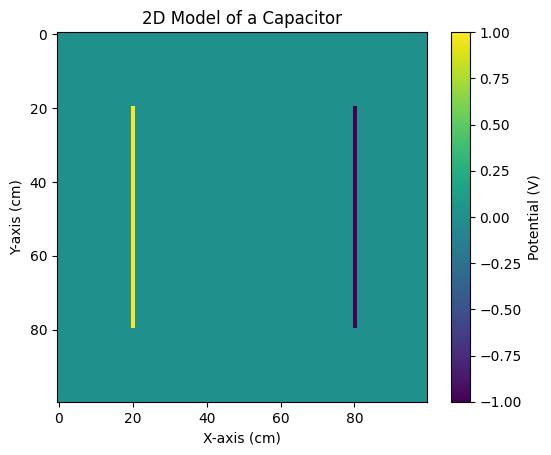

In [52]:
# initialize grid
nx, ny = (100, 100)

# define relevant vars
v_pos = 1  # positive plate voltage
v_neg = -1  # negative plate voltage

# define plate characteristics
plate_length = 60
plate_start = 20
plate_end = plate_start + plate_length

# intialize the potential array
phi = np.zeros((nx, ny))

# all boundaries default set to 0

# define plates on phi
phi[plate_start:plate_end, 20] = v_pos # positive plate
phi[plate_start:plate_end, nx - 20] = v_neg # negative plate

# plot capacitor
plt.imshow(phi)
plt.colorbar(label='Potential (V)')
plt.title('2D Model of a Capacitor')
plt.xlabel('X-axis (cm)')
plt.ylabel('Y-axis (cm)')
plt.show()

&#128309; Before doing anything else, visualize what you think the electric potential in the box should look like. Then use array-indexing and the relaxation method to compute the solution to an accuracy of $10^{-6}$ V everywhere in the box. Plot your result. *Hint: what are ALL the boundary conditions in this problem?* ✅

✍🏽 Before doing any coding, I believe the electric potential in the box should converge to a gradient distribution around each capacitor plate. This will look like radiating rays away from each plate eventually becoming a moderated background temperature.

Converged after  2602  iterations


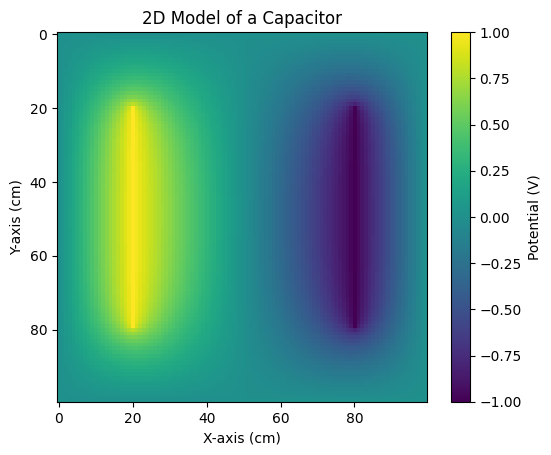

In [53]:
# initialize grid
nx, ny = (100, 100)

# define relevant vars
v_pos = 1  # positive plate voltage
v_neg = -1  # negative plate voltage
target_accuracy = 1e-6

# define plate characteristics
plate_length = 60
plate_start = 20
plate_end = plate_start + plate_length

# intialize the potential array
phi = np.zeros((nx, ny))

# all boundaries default set to 0

# define plates on phi
phi[plate_start:plate_end, 20] = v_pos # positive plate
phi[plate_start:plate_end, nx - 20] = v_neg # negative plate

# initialize update array
phi_new = np.copy(phi)

# jacobi iterations
done = False
iteration = 0

while not done:
    iteration += 1
    
    # update via central difference approximation, solved for phi, in vectorized form
    phi_new[1:-1, 1:-1] = 0.25 * (phi[2:, 1:-1] + phi[:-2, 1:-1] + phi[1:-1, 2:] + phi[1:-1, :-2])
    
    # boundary conditions
    phi_new[plate_start:plate_end, 20] = v_pos
    phi_new[plate_start:plate_end, nx - 20] = v_neg
    
    # update max diff
    max_diff = np.max(np.abs(phi_new - phi))

    # copy array
    phi[:] = phi_new[:]
    
    # stop if done
    if max_diff < target_accuracy:
        done = True

print("Converged after ", iteration, " iterations")

# plot capacitor
plt.imshow(phi)
plt.colorbar(label='Potential (V)')
plt.title('2D Model of a Capacitor')
plt.xlabel('X-axis (cm)')
plt.ylabel('Y-axis (cm)')
plt.show()

&#128310; Comment on your solution. Does it look as you expect? 

✍🏽 Yes, this is similar to what I expected because they look like rays going out towards a fixed background value of around 0 potential. If the plates were closer together, I wonder if there would be more a gradient in between the two plates. 

# Acknowledgments

S.E. Clark 2024, with Laplace equation problems adapted from Newman 2013.